# Thư viện cần thiết

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from graphviz import Source
from IPython.display import Image
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

# Palmer Penguins dataset

## 1. Chuẩn bị dataset

### 1.1. Train và test dataset

In [8]:
# Fetch Palmer Penguins dataset using seaborn
penguins = sns.load_dataset('penguins')

# Handle missing values
data = penguins.dropna().reset_index(drop=True)

# Apply one-hot encoding to categorical feature 'sex'
data = pd.get_dummies(data, columns=['sex'], prefix='sex', dtype=int)

# Define features (bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex_Male, sex_Female)
feature_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex_Male', 'sex_Female']
features = data[feature_columns].values

# Define labels (species)
raw_labels = np.ravel(data['species'])

# Encode the target variable
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(raw_labels)

# Define class names
class_names = ['Adelie', 'Chinstrap', 'Gentoo']

# Define train/test split proportions
split_ratios = [(0.4, 0.6), (0.6, 0.4), (0.8, 0.2), (0.9, 0.1)]

# Container for storing training and test datasets
subsets = []

for split_ratio in split_ratios:
    feature_train, feature_test, label_train, label_test = train_test_split(
        features, labels_encoded, test_size=split_ratio[1], random_state=42, stratify=labels_encoded
    )
    
    subsets.append({
        'feature_train': feature_train,
        'label_train': label_train,
        'feature_test': feature_test,
        'label_test': label_test,
        'split': f"{int(split_ratio[0]*100)}/{int(split_ratio[1]*100)}"
    })

### 1.2. Visualization

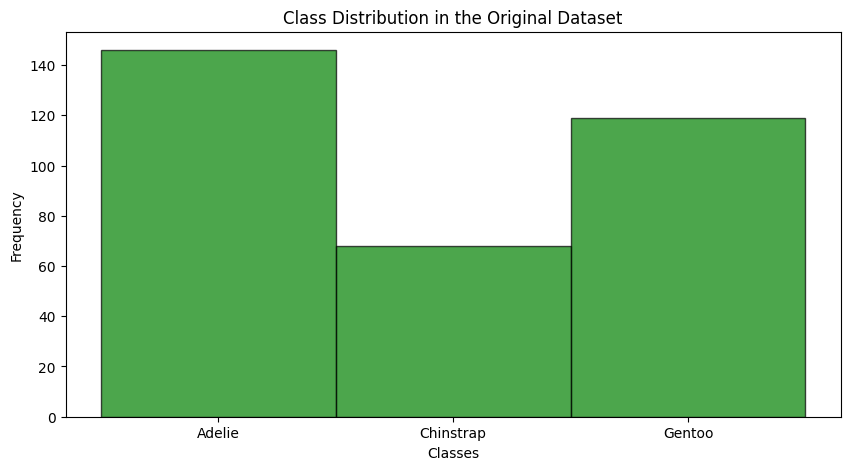

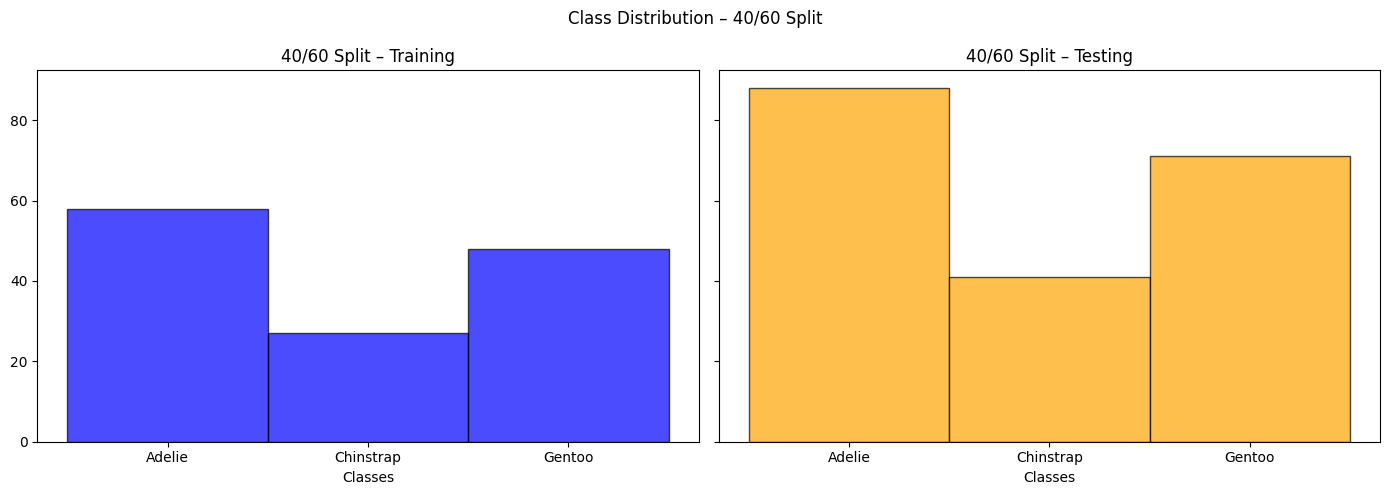

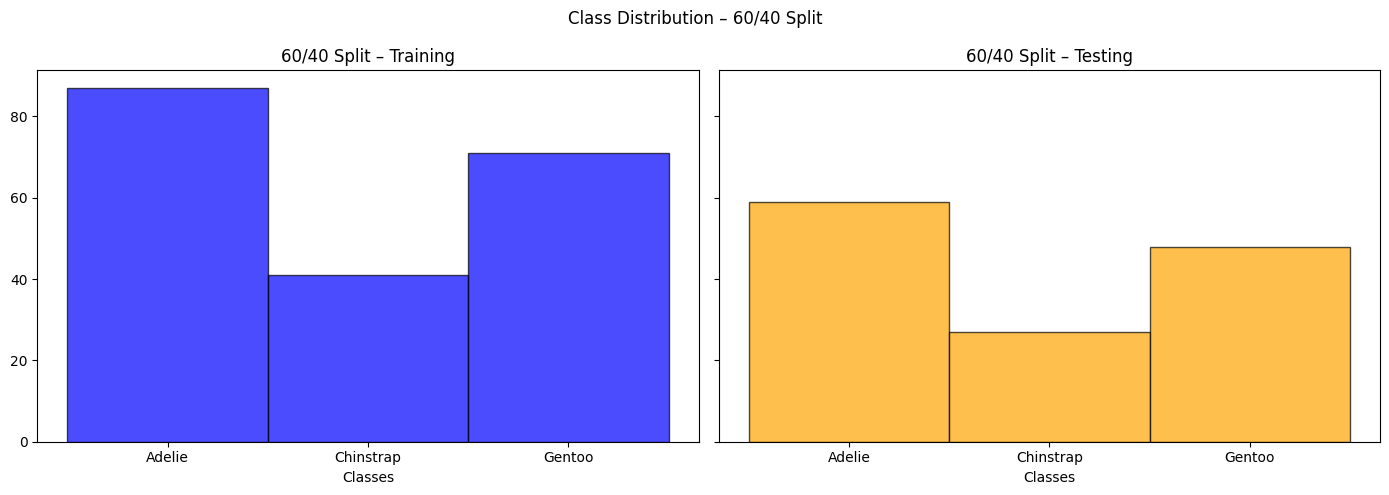

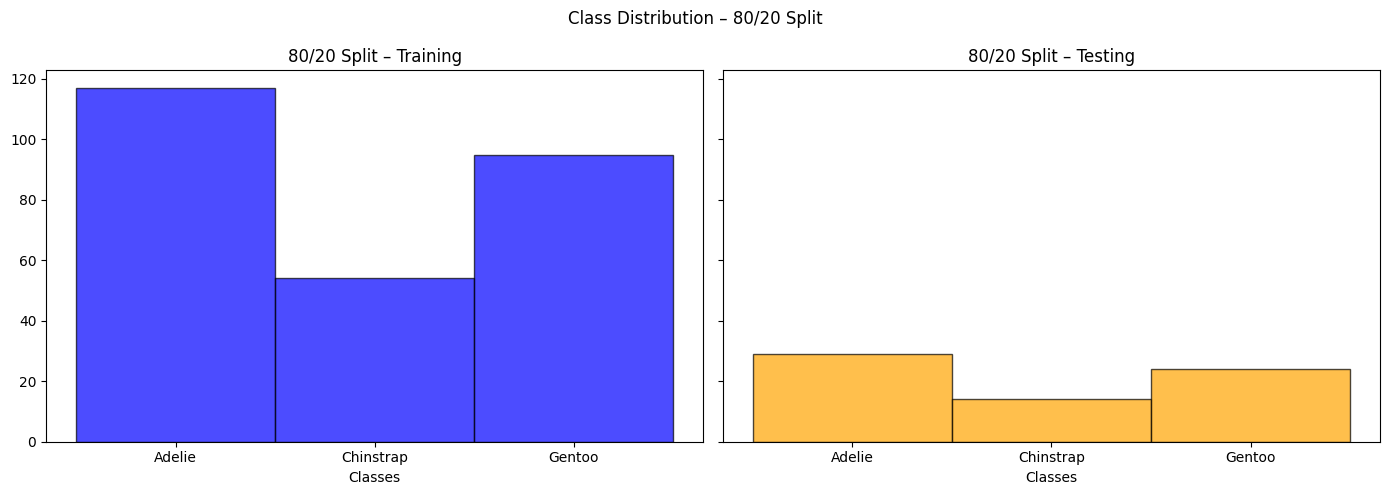

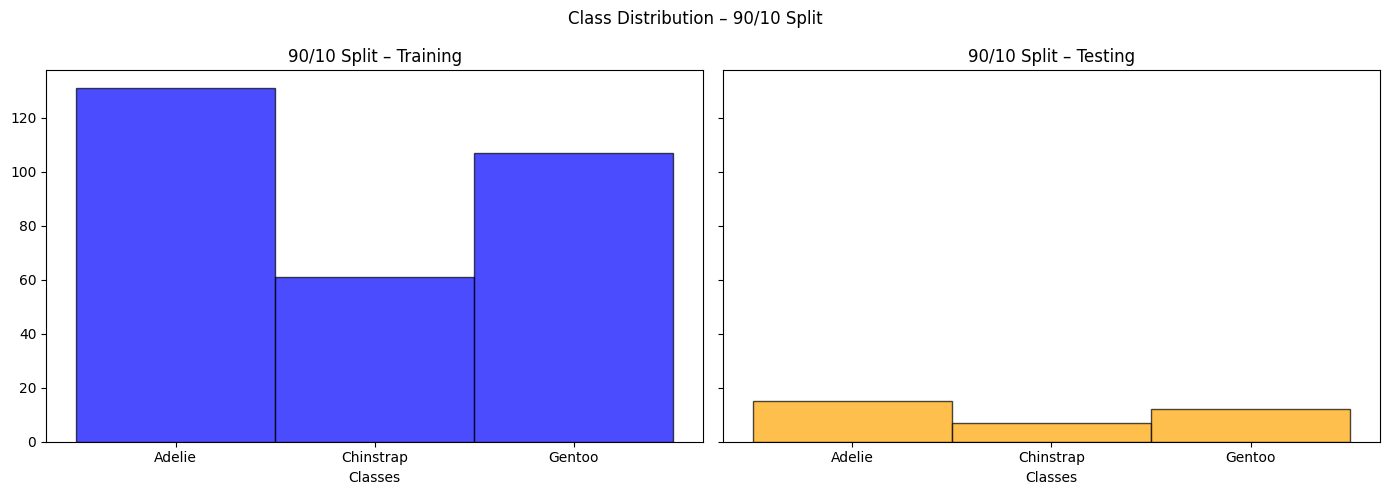

In [9]:
# Phân bố lớp trong tập dữ liệu gốc
plt.figure(figsize=(10, 5))
bins = np.arange(len(np.unique(labels_encoded)) + 1) - 0.5
plt.hist(labels_encoded, bins=bins, color="green", alpha=0.7, edgecolor="black")
plt.title("Class Distribution in the Original Dataset")
plt.xlabel("Classes")
plt.ylabel("Frequency")
plt.xticks(np.arange(len(class_names)), class_names)
plt.show()

# Vẽ phân bố lớp cho từng tập train/test tương ứng (gộp 1 hình 2 biểu đồ)
for subset in subsets:
    label_train = subset['label_train']
    label_test = subset['label_test']
    split_label = subset['split']
    
    bins = np.arange(len(np.unique(labels_encoded)) + 1) - 0.5

    fig, axs = plt.subplots(1, 2, figsize=(14, 5), sharey=True)
    
    axs[0].hist(label_train, bins=bins, color="blue", alpha=0.7, edgecolor="black")
    axs[0].set_title(f"{split_label} Split – Training")
    axs[0].set_xlabel("Classes")
    axs[0].set_xticks(np.arange(len(class_names)))
    axs[0].set_xticklabels(class_names)
    
    axs[1].hist(label_test, bins=bins, color="orange", alpha=0.7, edgecolor="black")
    axs[1].set_title(f"{split_label} Split – Testing")
    axs[1].set_xlabel("Classes")
    axs[1].set_xticks(np.arange(len(class_names)))
    axs[1].set_xticklabels(class_names)

    plt.suptitle(f"Class Distribution – {split_label} Split")
    plt.tight_layout()
    plt.show()

## 2. Xây dựng Decision Tree

### 2.1. Train model

In [4]:
# Train and evaluate the Decision Tree model using Entropy (Information Gain)
models = []
for i, subset in enumerate(subsets):
    feature_train = subset['feature_train']
    label_train = subset['label_train']
    model = DecisionTreeClassifier(criterion='entropy', random_state=42, class_weight='balanced')
    model.fit(feature_train, label_train)
    models.append(model)

### 2.2. Visualization

Decision tree of the model trained with split ratio 40/60


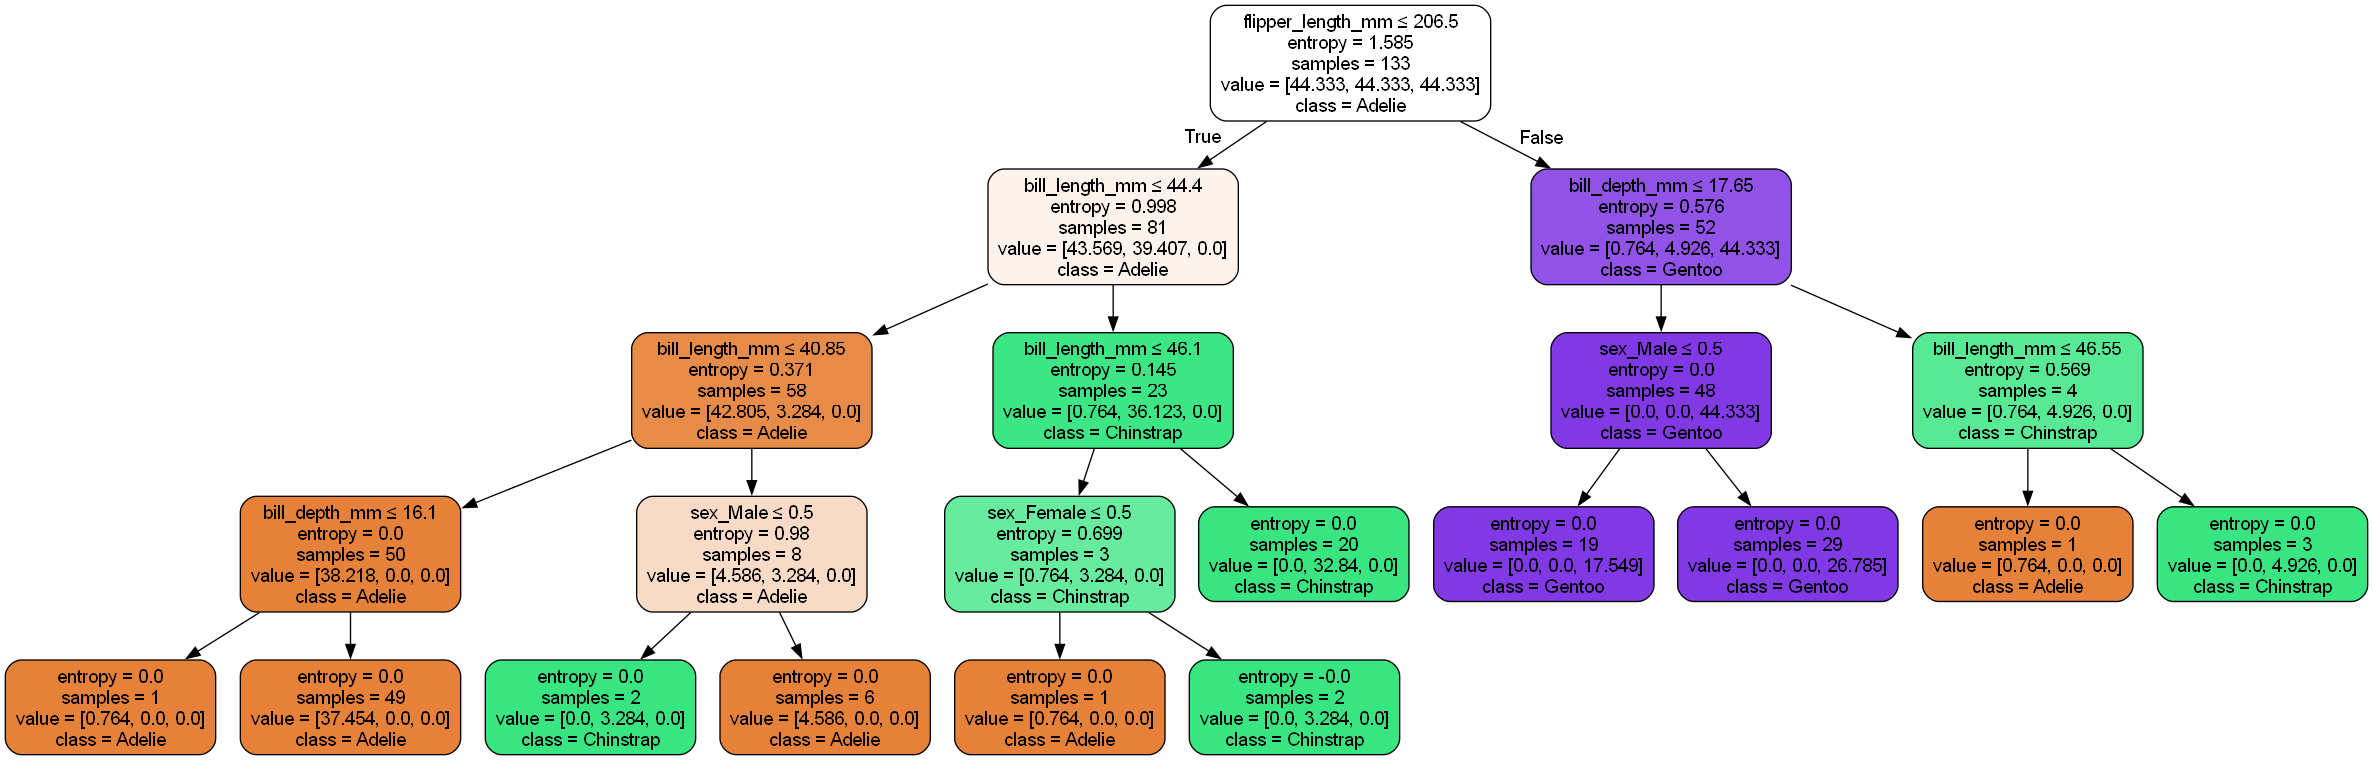

Decision tree of the model trained with split ratio 60/40


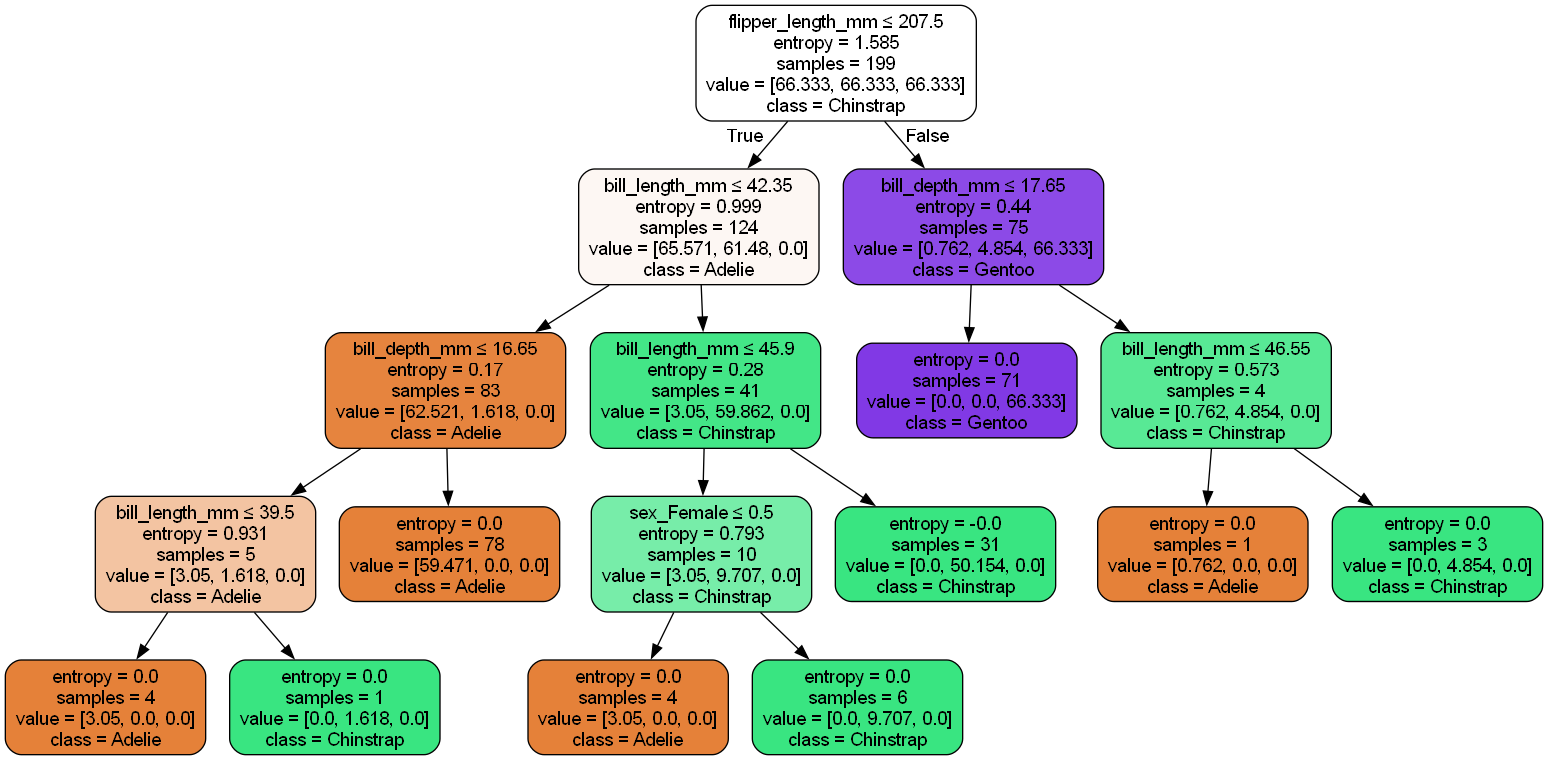

Decision tree of the model trained with split ratio 80/20


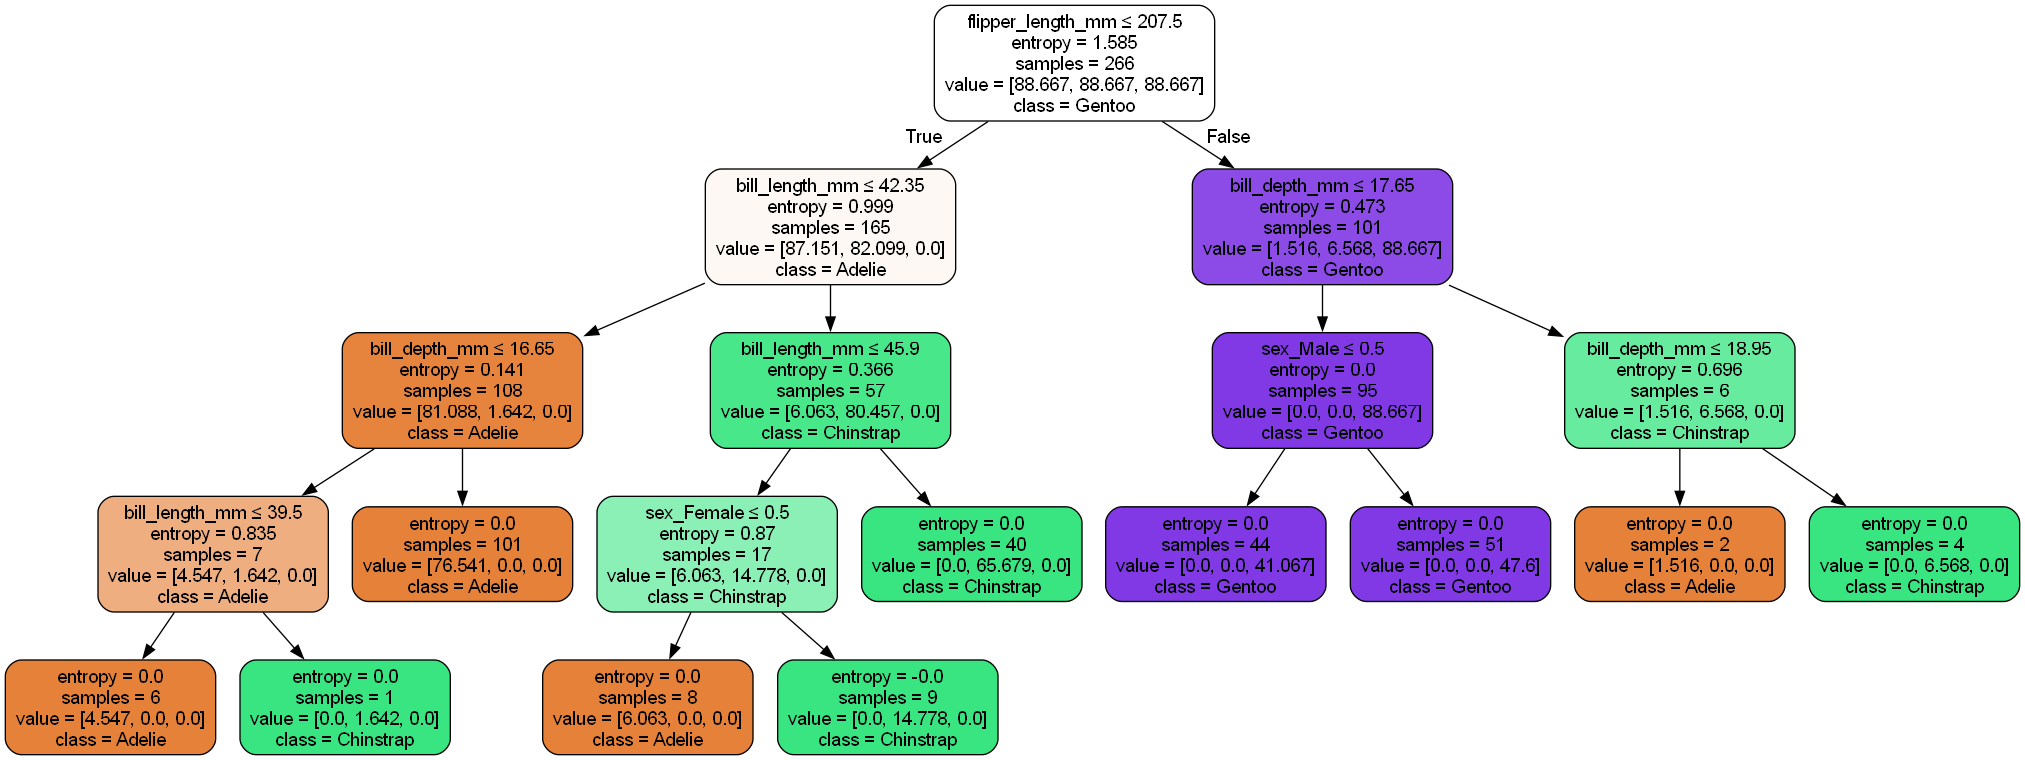

Decision tree of the model trained with split ratio 90/10


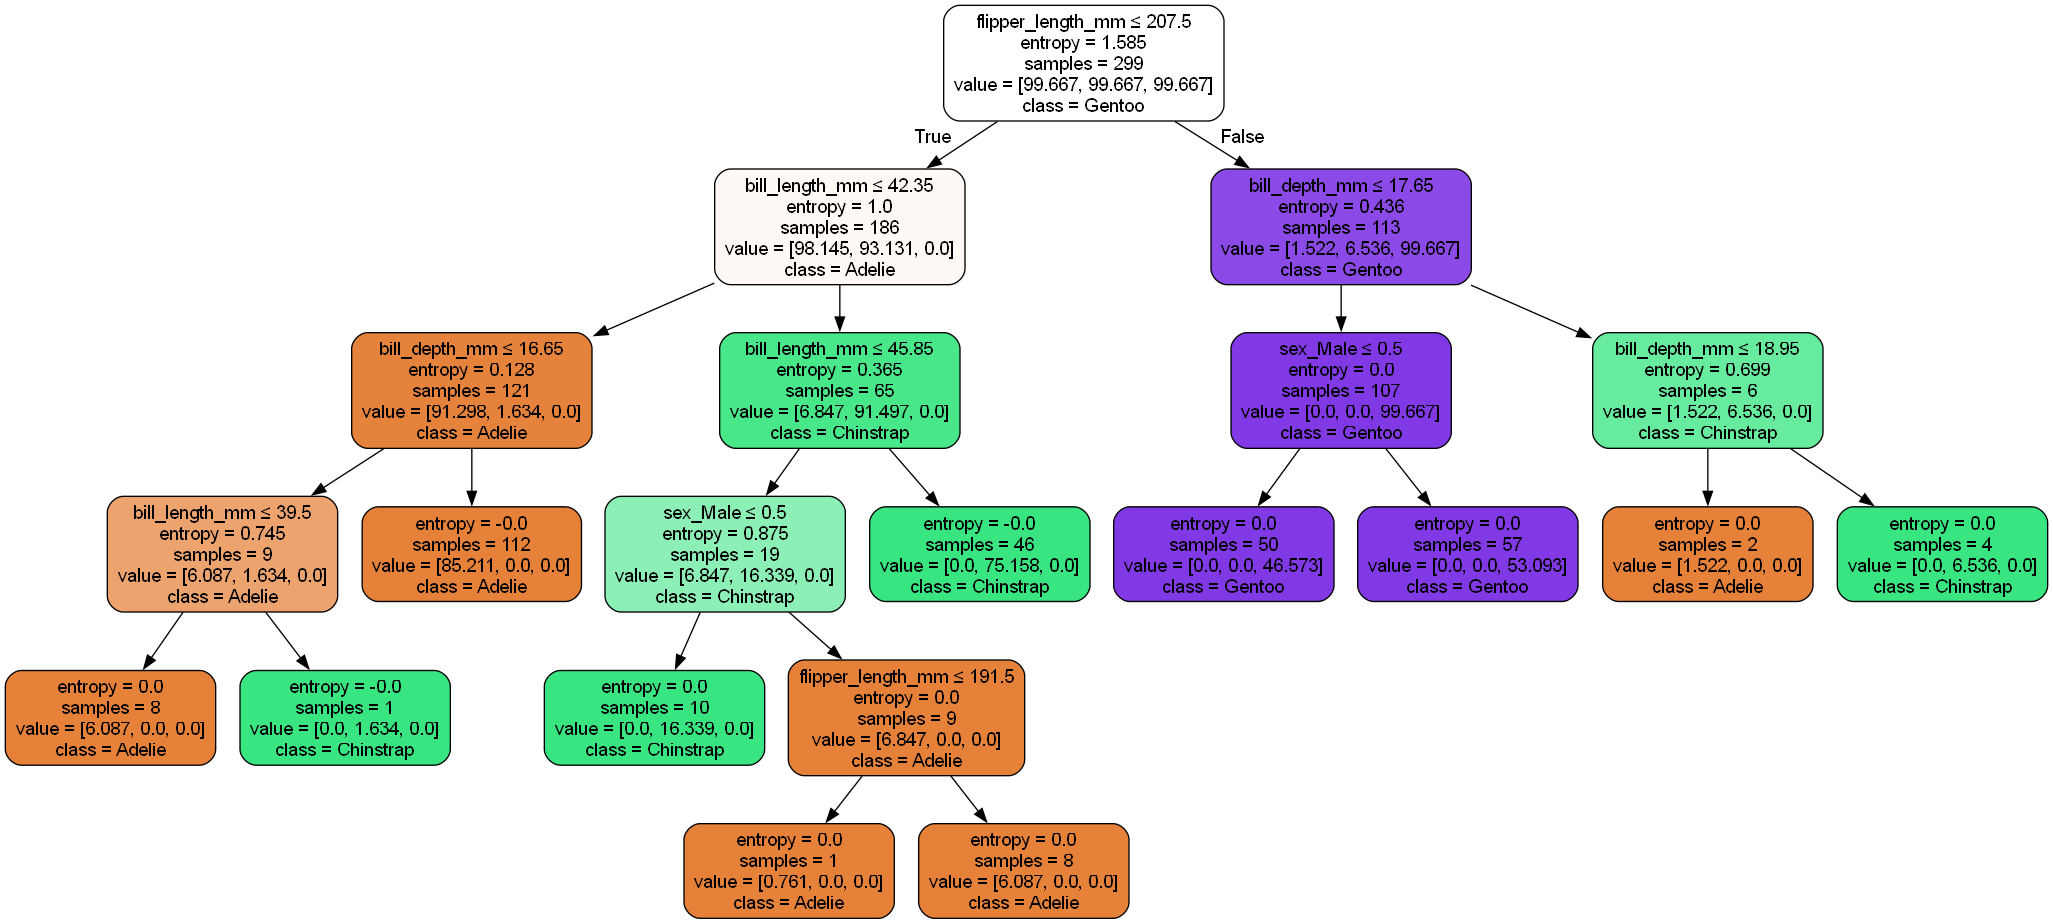

In [12]:
for i in range(len(models)):
    print(f"Decision tree of the model trained with split ratio {int(split_ratios[i][0]*100)}/{int(split_ratios[i][1]*100)}")
    # Export the decision tree to DOT format
    dot_data = export_graphviz(
        models[i],  # Use correct model from the list
        out_file=None,
        feature_names=feature_columns,  # Use defined feature columns
        class_names=class_names,  # Use meaningful class names
        filled=True,
        rounded=True,
        special_characters=True,
        fontname="Arial"  # Avoid Pango warnings
    )
    
    # Render the DOT file with Graphviz
    graph = Source(dot_data)
    # Visualize the tree
    graph.render(f"./tree/tree2/tree_{split_ratios[i][0]}_{split_ratios[i][1]}", 
                 format='png', 
                 cleanup=True)
    display(Image(filename=f"./tree/tree2/tree_{split_ratios[i][0]}_{split_ratios[i][1]}.png"))

## 3. Đánh giá Decision Tree

### 3.1. Classification report & confusion matrix

Split (0.4, 0.6) Class Distribution in Test Set:
Adelie       88
Chinstrap    41
Gentoo       71
Name: count, dtype: int64
Classification Report for 0.4/0.6 Split:
              precision    recall  f1-score   support

      Adelie       1.00      0.97      0.98        88
   Chinstrap       0.91      1.00      0.95        41
      Gentoo       1.00      0.99      0.99        71

    accuracy                           0.98       200
   macro avg       0.97      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



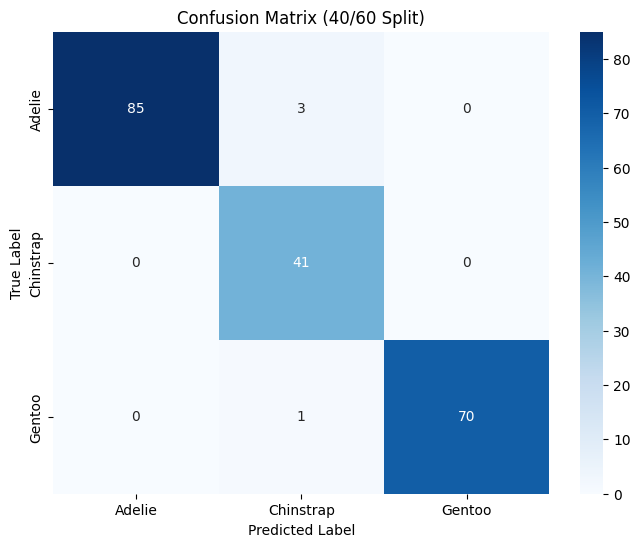

Split (0.6, 0.4) Class Distribution in Test Set:
Adelie       59
Chinstrap    27
Gentoo       48
Name: count, dtype: int64
Classification Report for 0.6/0.4 Split:
              precision    recall  f1-score   support

      Adelie       1.00      0.98      0.99        59
   Chinstrap       0.90      1.00      0.95        27
      Gentoo       1.00      0.96      0.98        48

    accuracy                           0.98       134
   macro avg       0.97      0.98      0.97       134
weighted avg       0.98      0.98      0.98       134



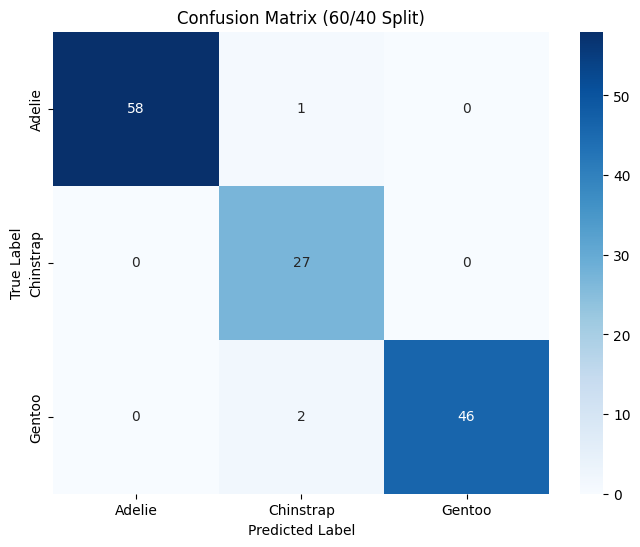

Split (0.8, 0.2) Class Distribution in Test Set:
Adelie       29
Chinstrap    14
Gentoo       24
Name: count, dtype: int64
Classification Report for 0.8/0.2 Split:
              precision    recall  f1-score   support

      Adelie       1.00      0.97      0.98        29
   Chinstrap       0.82      1.00      0.90        14
      Gentoo       1.00      0.92      0.96        24

    accuracy                           0.96        67
   macro avg       0.94      0.96      0.95        67
weighted avg       0.96      0.96      0.96        67



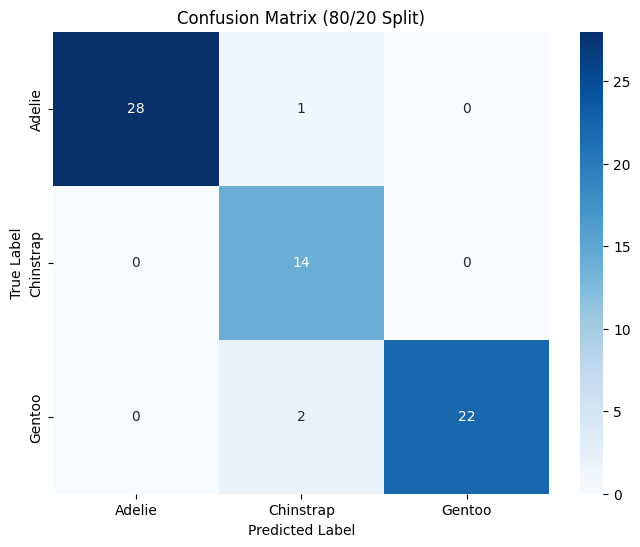

Split (0.9, 0.1) Class Distribution in Test Set:
Adelie       15
Chinstrap     7
Gentoo       12
Name: count, dtype: int64
Classification Report for 0.9/0.1 Split:
              precision    recall  f1-score   support

      Adelie       1.00      0.93      0.97        15
   Chinstrap       0.70      1.00      0.82         7
      Gentoo       1.00      0.83      0.91        12

    accuracy                           0.91        34
   macro avg       0.90      0.92      0.90        34
weighted avg       0.94      0.91      0.92        34



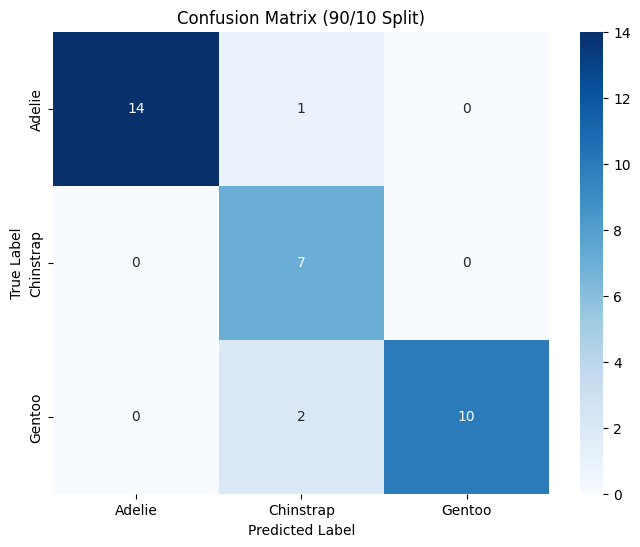

In [14]:
# For each model and split, make predictions, generate a report, and confusion matrix
for i, subset in enumerate(subsets):
    feature_train = subset['feature_train']
    label_train = subset['label_train']
    feature_test = subset['feature_test']
    label_test = subset['label_test']
    
    # Make predictions
    label_pred = models[i].predict(feature_test)
    
    # Print class distribution in test set
    print(f"Split {split_ratios[i]} Class Distribution in Test Set:")
    print(pd.Series(label_test).value_counts().sort_index().rename(index=dict(enumerate(class_names))))
    
    # Generate classification report
    print(f"Classification Report for {split_ratios[i][0]}/{split_ratios[i][1]} Split:")
    print(classification_report(label_test, label_pred, target_names=class_names, zero_division=0))
    
    # Generate confusion matrix
    cm = confusion_matrix(label_test, label_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.title(f"Confusion Matrix ({int(split_ratios[i][0]*100)}/{int(split_ratios[i][1]*100)} Split)")
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

### 3.2. Insights

#### 3.2.1. Tỷ lệ 40/60

- Độ chính xác: 98% trên 200 mẫu kiểm tra.

- F1-score trung bình: 0.98, hiệu suất đồng đều giữa các lớp.

- Mô hình nhận diện tốt cả 3 lớp, không có dấu hiệu mất cân bằng.

#### 3.2.2. Tỷ lệ 60/40

- Độ chính xác: 98% trên 134 mẫu kiểm tra.

- F1-score trung bình: 0.97.

- Lớp Chinstrap có recall đạt 1.00 nhưng precision thấp do số lượng mẫu ít nên bị ảnh hưởng rõ rệt khi có mẫu nhầm lẫn.

#### 3.2.3. Tỷ lệ 80/20

- Độ chính xác: 96% trên 67 mẫu kiểm tra.

- F1-score trung bình: 0.95.

- Precision của lớp Chinstrap giảm xuống 0.82, vẫn bị ảnh hưởng bởi số lượng mẫu kiểm tra thấp.

#### 3.2.4. Tỷ lệ 90/10

- Độ chính xác thấp nhất trong các mô hình: 91% trên 34 mẫu kiểm tra.

- F1-score trung bình: 0.90.

- Precision của lớp Chinstrap giảm mạnh, còn 0.70. Mô hình thiếu ổn định do tập test quá nhỏ.

### 3.3. Kết luận chung

- Mô hình đạt hiệu suất cao ở tất cả các tỷ lệ.

- Tỷ lệ 40/60 và 60/40 cho hiệu quả cao và ổn định nhất.

- Tỷ lệ 90/10 dễ gây sai số do tập kiểm tra quá nhỏ, đặc biệt ảnh hưởng đến lớp có ít mẫu như Chinstrap.

## 4. Độ sâu (depth) và độ chính xác (accuracy) của Decision Tree

### 4.1 Visualization

Decision tree of the model trained with split ratio 80/20 and max depth None


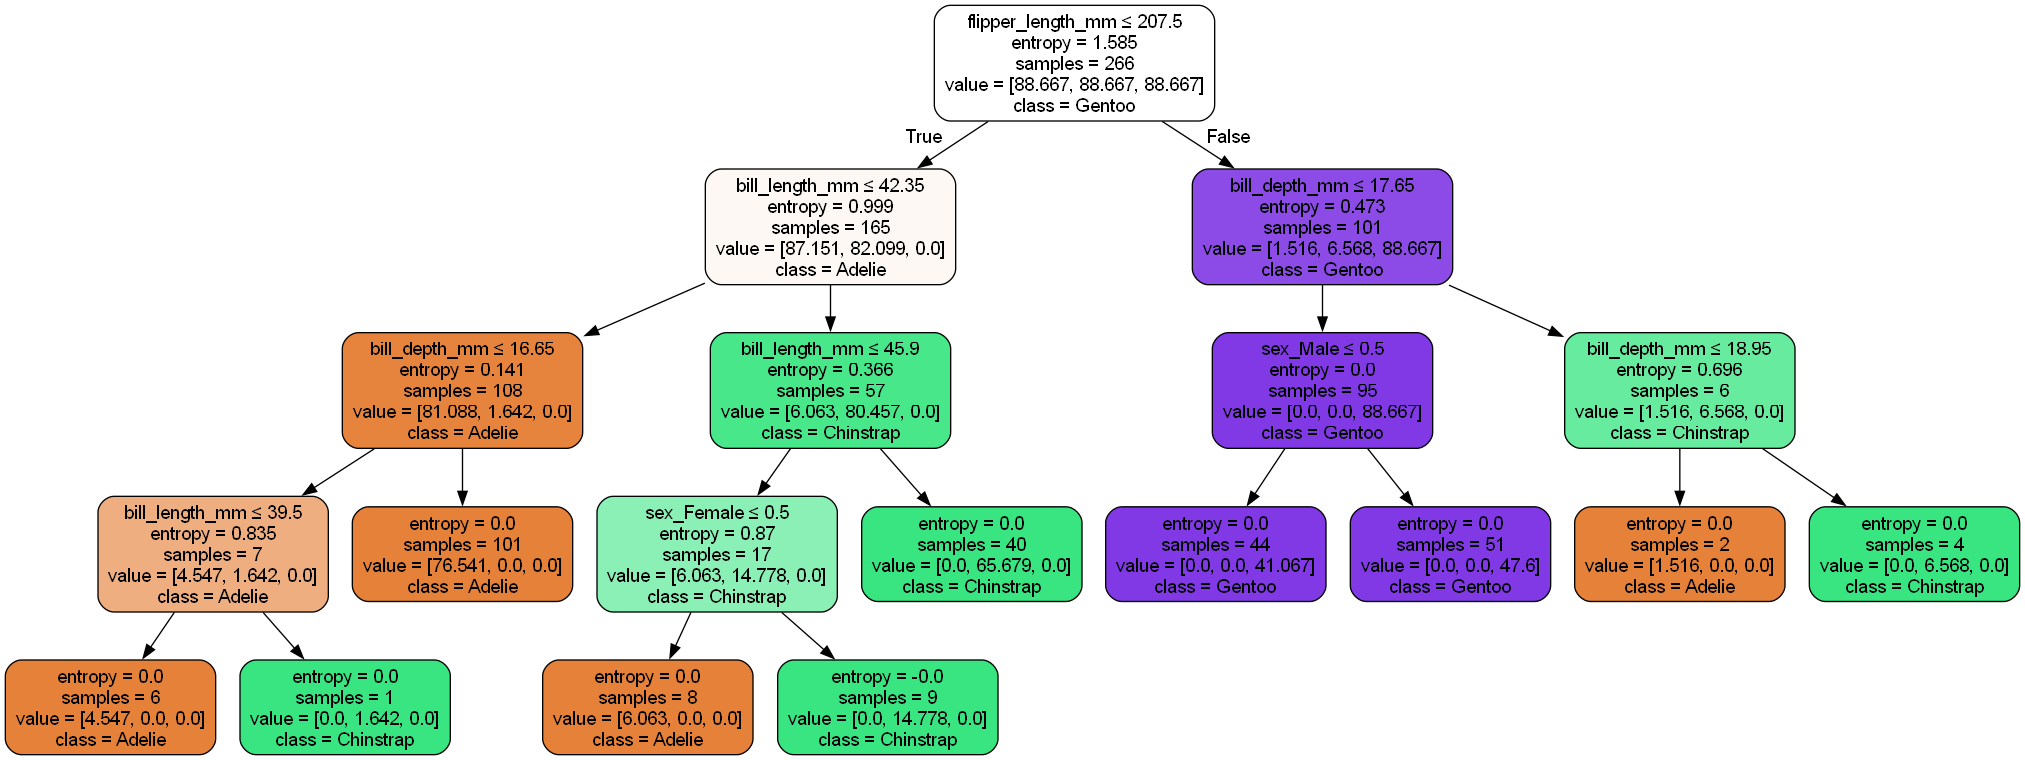

Accuracy for max_depth None: 0.9552
Decision tree of the model trained with split ratio 80/20 and max depth 2


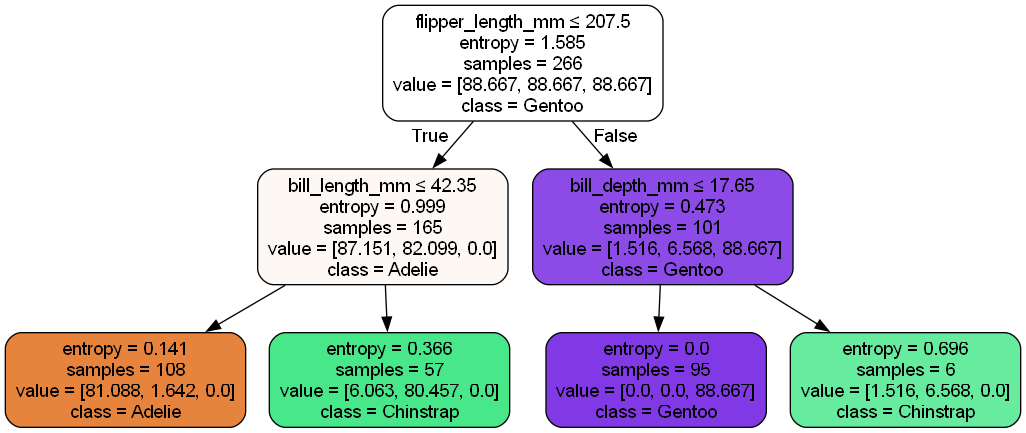

Accuracy for max_depth 2: 0.9254
Decision tree of the model trained with split ratio 80/20 and max depth 3


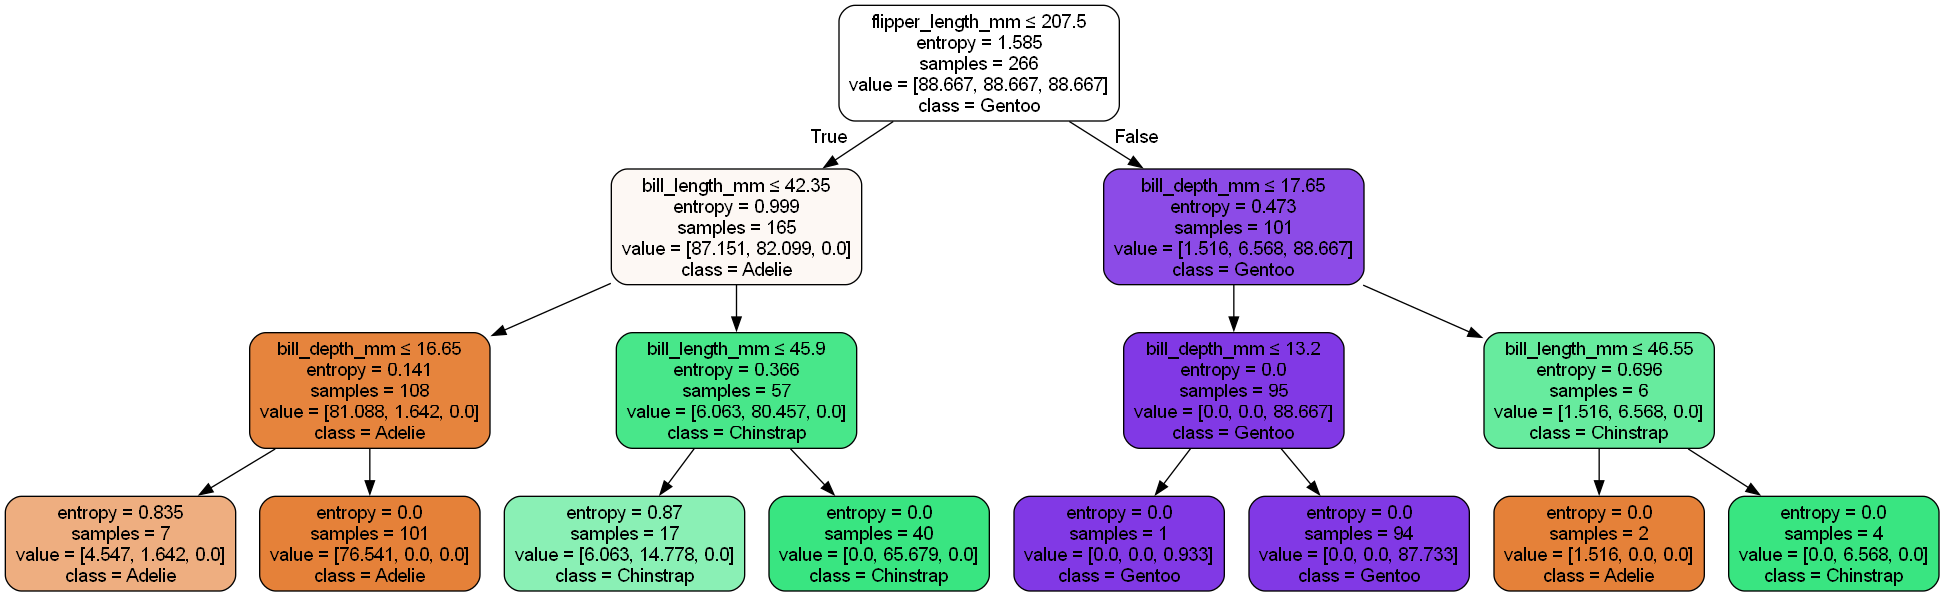

Accuracy for max_depth 3: 0.9254
Decision tree of the model trained with split ratio 80/20 and max depth 4


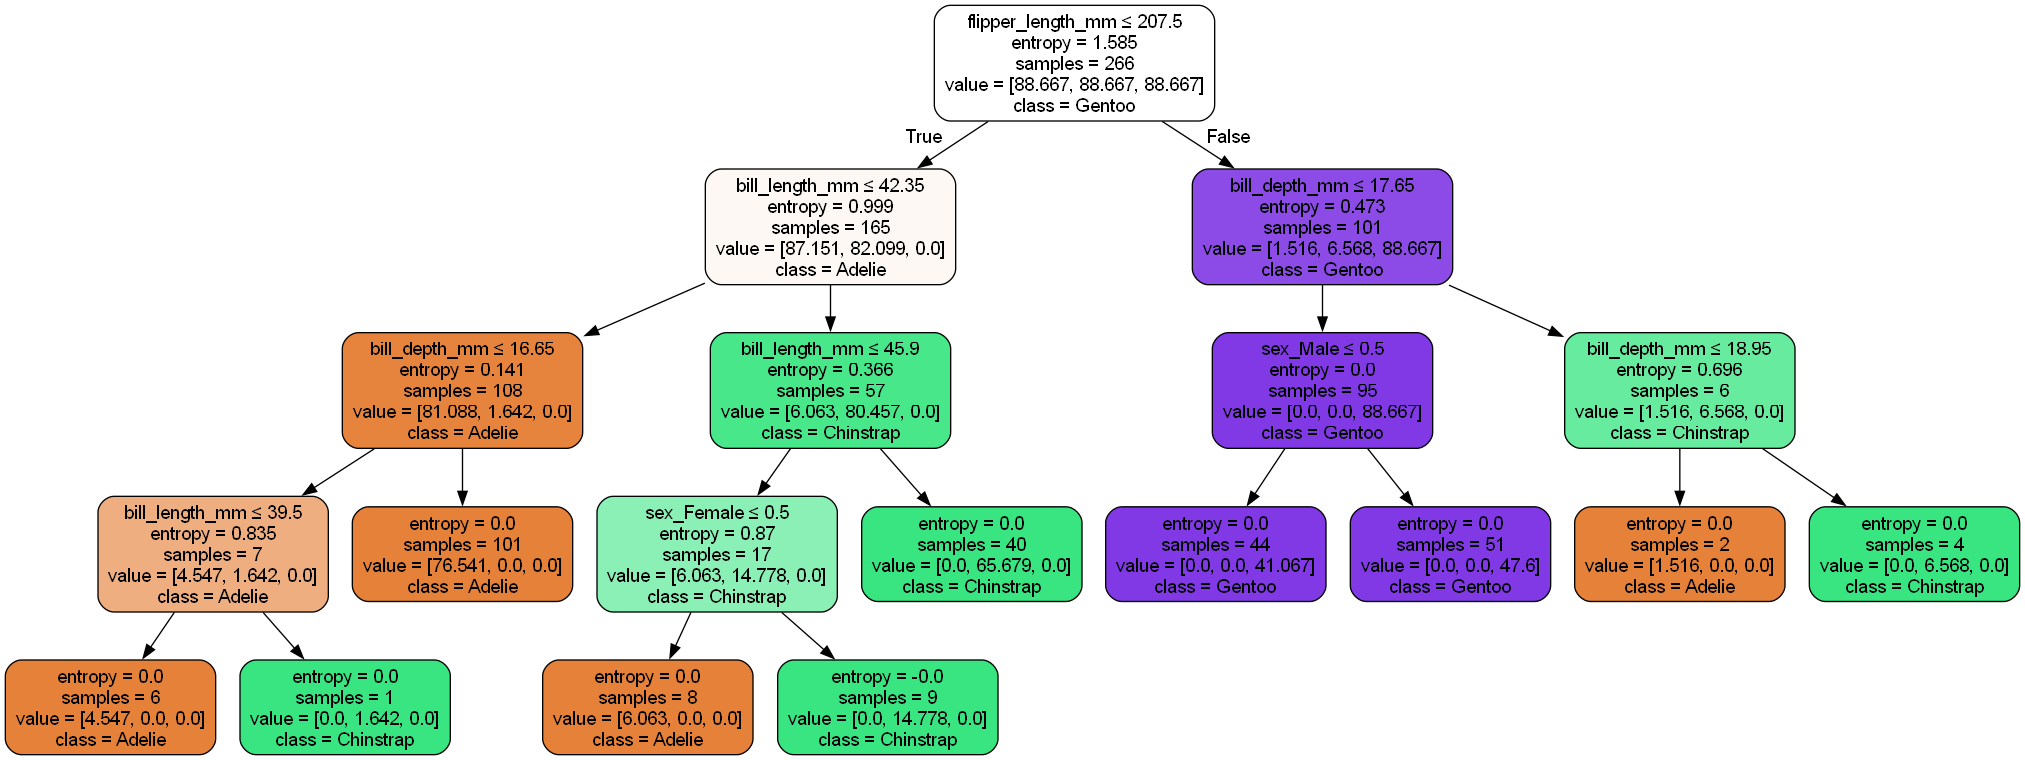

Accuracy for max_depth 4: 0.9552
Decision tree of the model trained with split ratio 80/20 and max depth 5


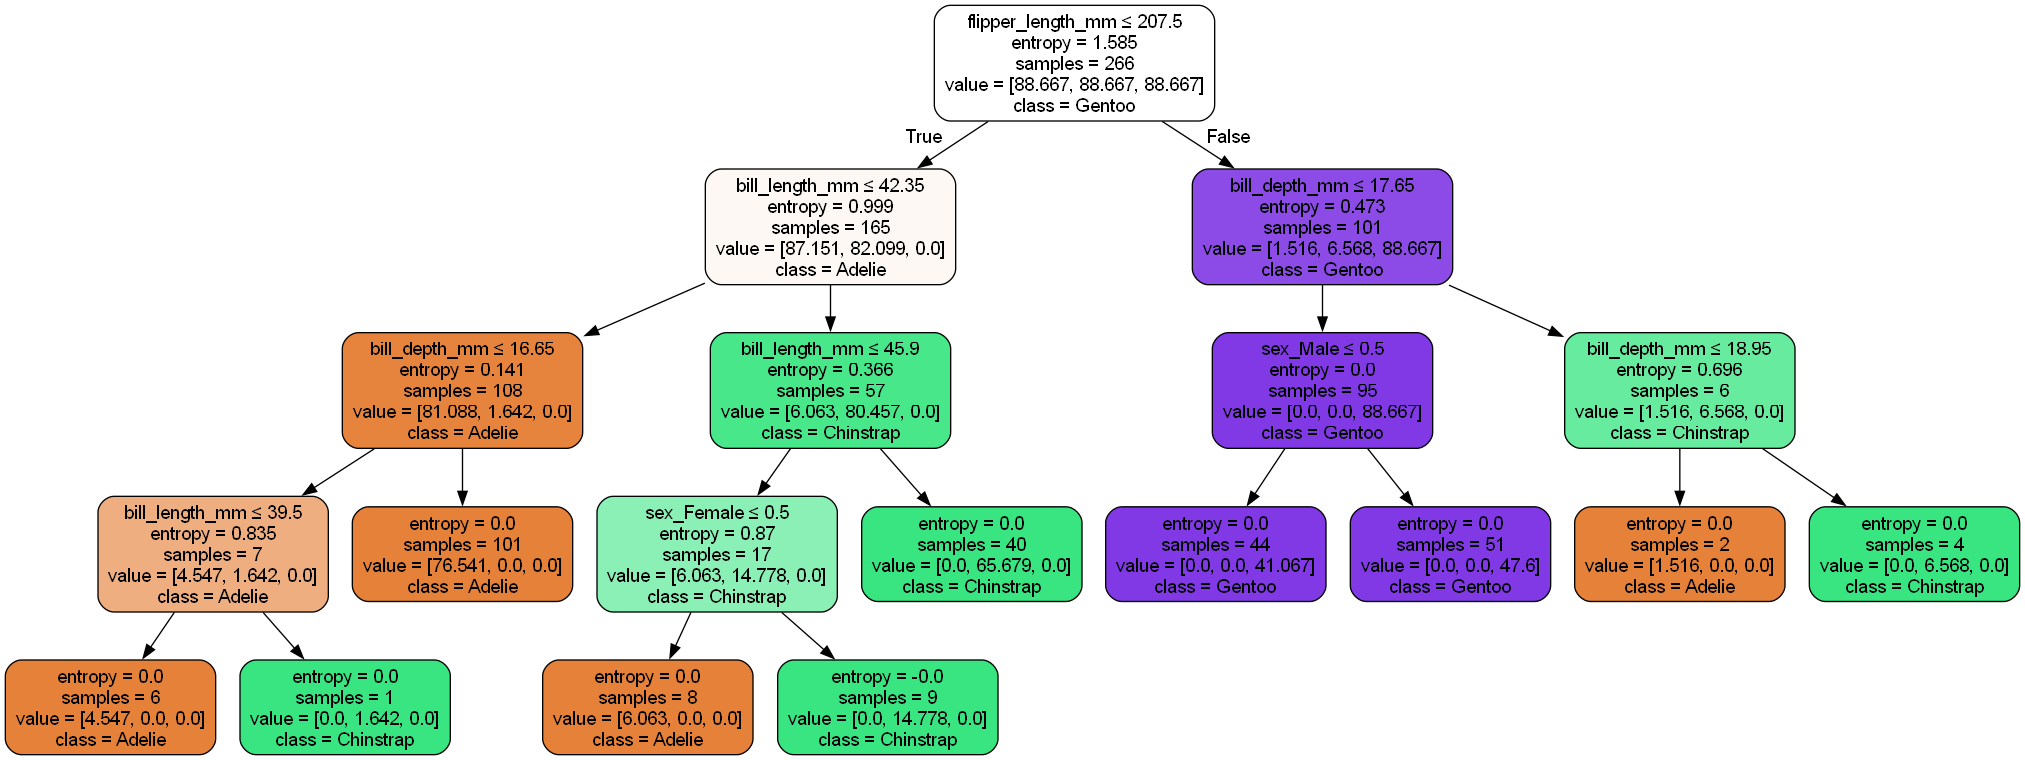

Accuracy for max_depth 5: 0.9552
Decision tree of the model trained with split ratio 80/20 and max depth 6


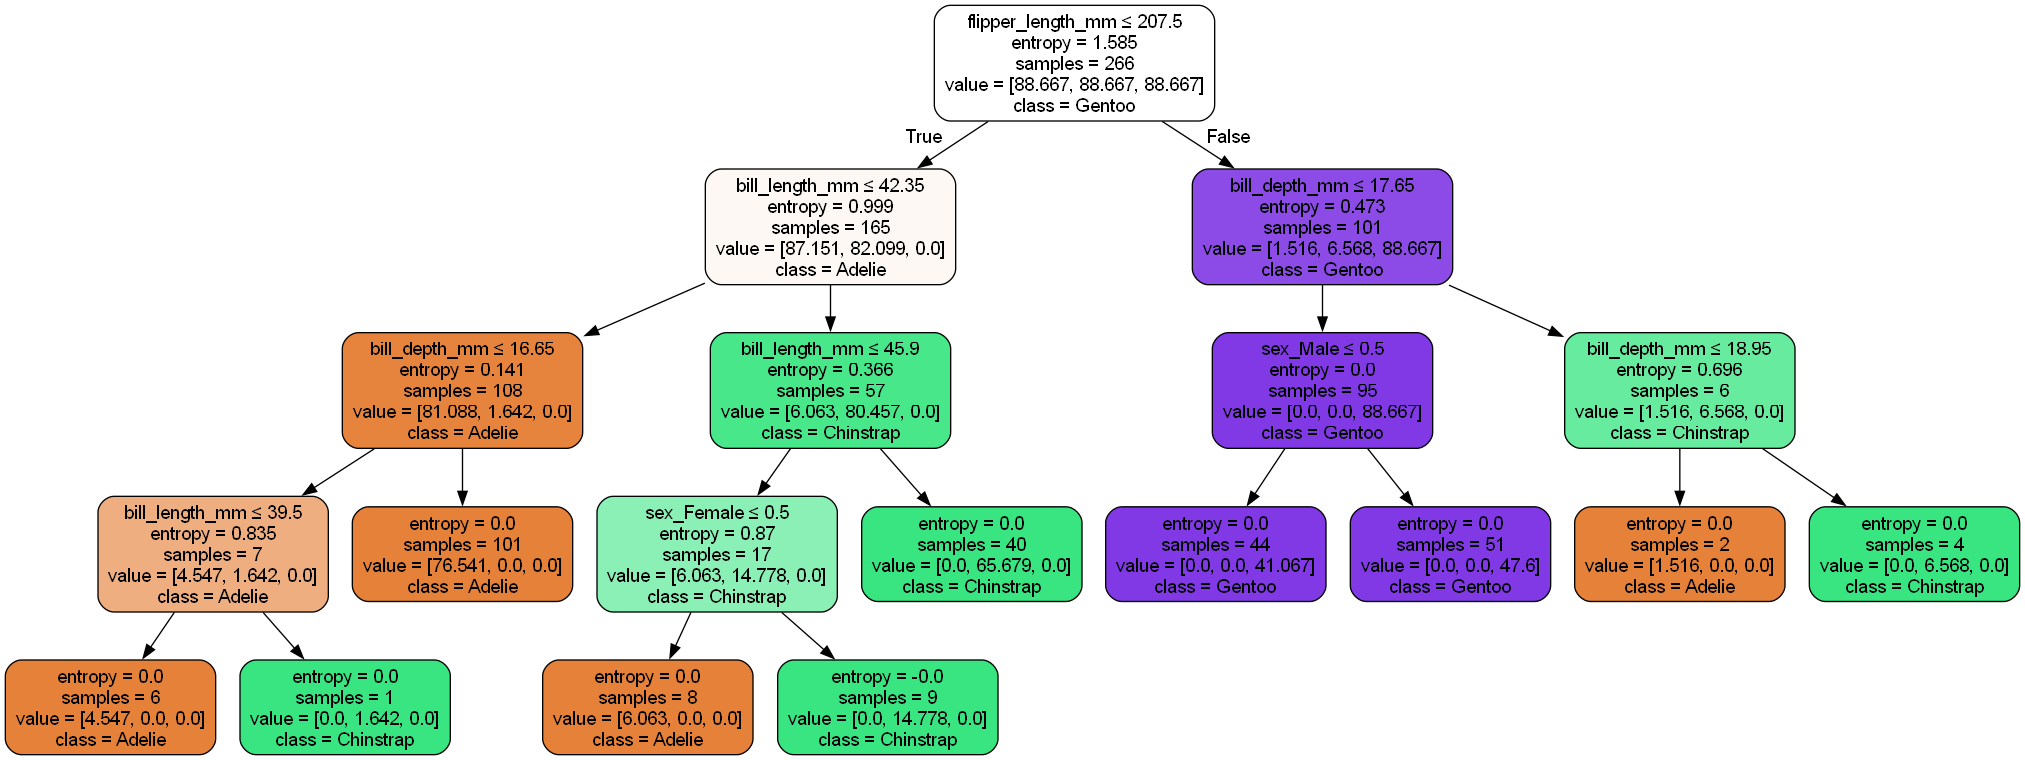

Accuracy for max_depth 6: 0.9552
Decision tree of the model trained with split ratio 80/20 and max depth 7


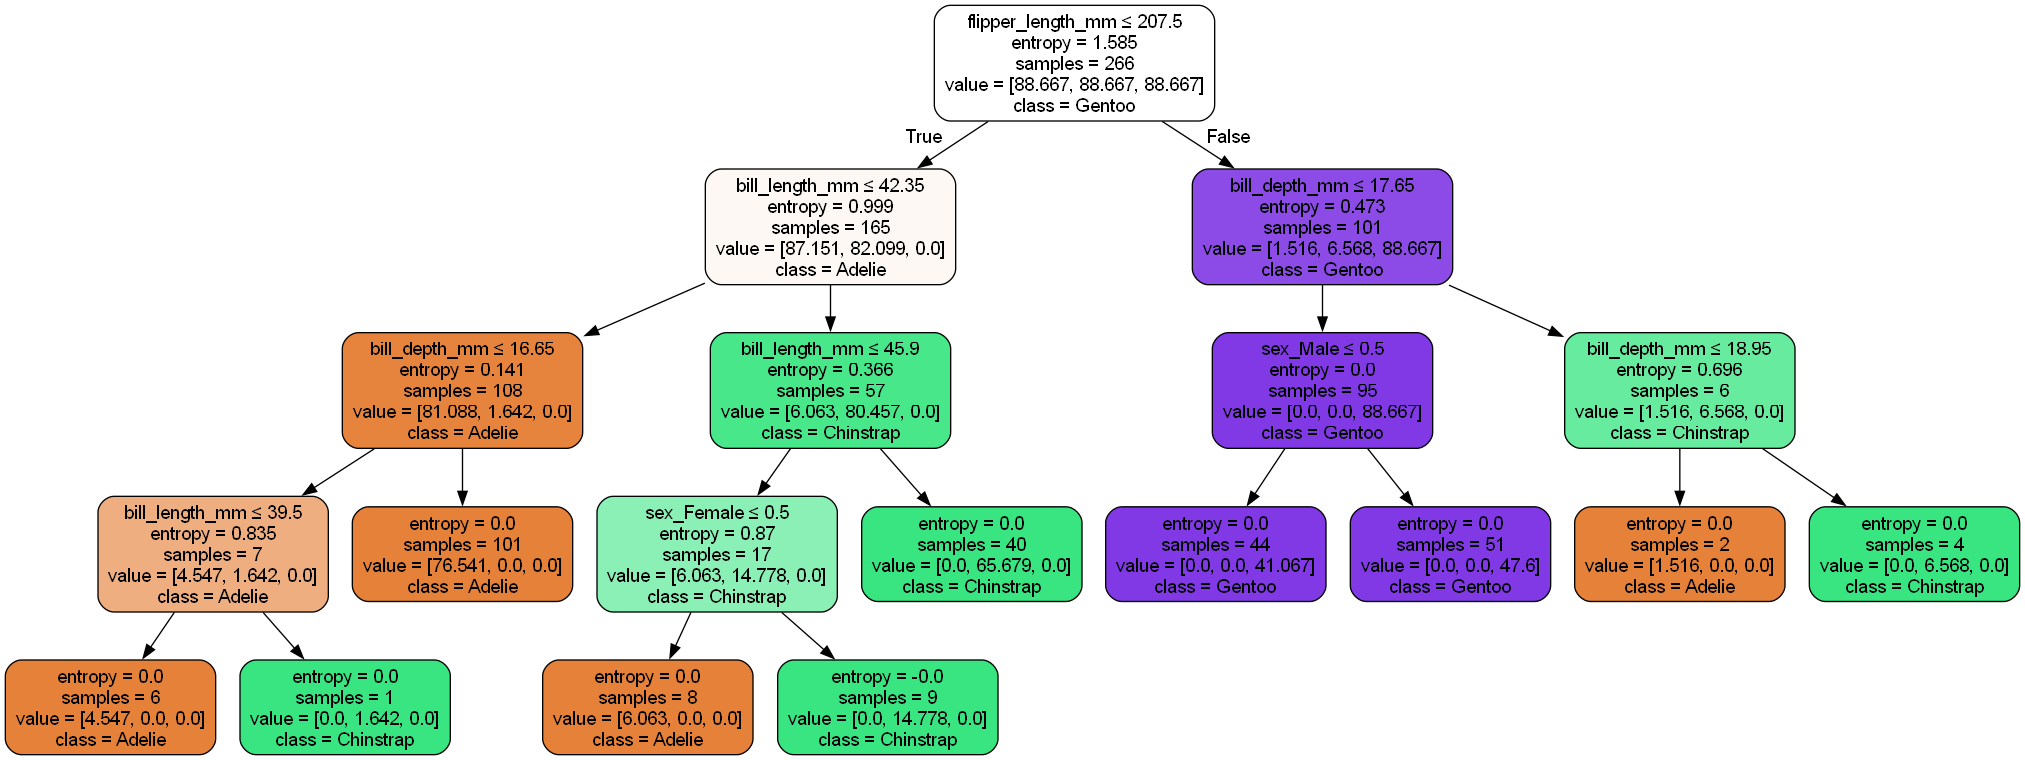

Accuracy for max_depth 7: 0.9552


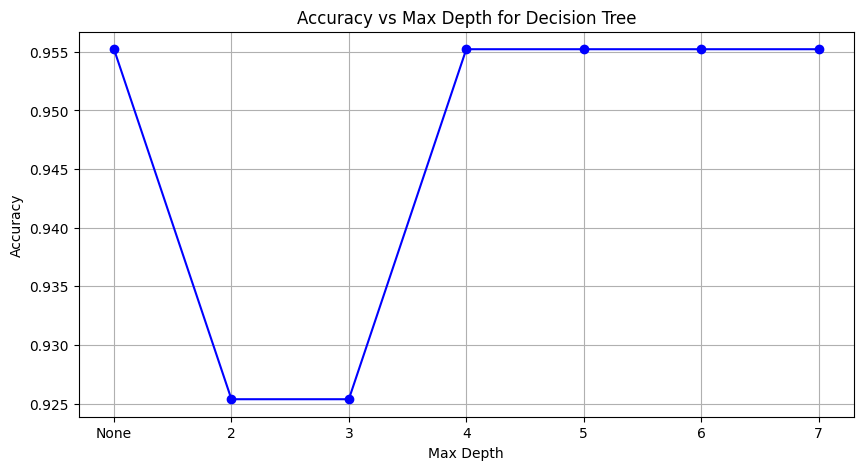

In [7]:
# Select the 80/20 split (index 2 in split_ratios)
subset_80_20 = subsets[2]
feature_train_80_20 = subset_80_20['feature_train']
label_train_80_20 = subset_80_20['label_train']
feature_test_80_20 = subset_80_20['feature_test']
label_test_80_20 = subset_80_20['label_test']

accuracy_scores = []
depths = [None, 2, 3, 4, 5, 6, 7]

for depth in depths:
    model = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=depth, class_weight='balanced')
    model.fit(feature_train_80_20, label_train_80_20)

    print(f"Decision tree of the model trained with split ratio 80/20 and max depth {depth}")
    # Export the decision tree to DOT format
    dot_data = export_graphviz(
        model,
        out_file=None,
        feature_names=feature_columns,
        class_names=class_names,
        filled=True,
        rounded=True,
        special_characters=True,
        fontname="Arial"
    )
    
    # Render the DOT file with Graphviz
    graph = Source(dot_data)
    # Visualize the tree
    graph.render(f"./tree_80_20/tree2/tree_{depth}", 
                 format='png', 
                 cleanup=True)
    display(Image(filename=f"./tree_80_20/tree2/tree_{depth}.png"))

    # Make predictions and calculate accuracy
    pred = model.predict(feature_test_80_20)
    accuracy = accuracy_score(label_test_80_20, pred)
    print(f"Accuracy for max_depth {depth}: {accuracy:.4f}")
    accuracy_scores.append(accuracy)

# Plot the results
depths_for_plot = [str(d) if d is not None else 'None' for d in depths]
plt.figure(figsize=(10, 5))
plt.plot(depths_for_plot, accuracy_scores, marker='o', linestyle='-', color='blue')
plt.title('Accuracy vs Max Depth for Decision Tree')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.xticks(depths_for_plot)
plt.grid(True)
plt.show()

### 4.2. Insights

|max_depth|None         |2            |3            |4            |5            |6            |7            |
|---------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|
|Accuracy|0.9552|0.9254|0.9254|0.9552|0.9552|0.9552|0.9552|

- Khi không giới hạn độ sâu (max_depth = None), mô hình đạt độ chính xác cao nhất (0.9552).
- Khi giới hạn độ sâu ở mức 2 hoặc 3, độ chính xác giảm xuống còn 0.9254, cho thấy mô hình chưa đủ phức tạp để phân biệt rõ các đặc trưng của từng lớp.
- Từ độ sâu 4 trở đi, mô hình đạt hiệu suất tối đa và giữ nguyên ổn định cho đến độ sâu 7.
